### Objective

-To predict whether a liability customer will buy a personal loan or not.
-Which variables are most significant.
-Which segment of customers should be targeted more.

In [1]:
# import necessary packages
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns", None)

In [2]:
#read in the data
data =r"C:\Users\obinn\AILEAD\Regression\Loan_Modelling.csv"
df1 = pd.read_csv(data)

In [3]:
df = df1.copy() #create a copy of the data to prevent accidental changes

In [4]:
df.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.shape

(5000, 14)

In [6]:
df.Personal_Loan.unique() # categorical data

array([0, 1], dtype=int64)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [9]:
df.Education.mode()

0    1
Name: Education, dtype: int64

In [10]:
df.Personal_Loan.unique() # we choose this as our target variable in terms of the objective of the project

array([0, 1], dtype=int64)

- the age of customer ranges between 23 to 67 year
- the average income of customers is 73,800 dollars per month while the minimum and maximum income is 8000 and 224,000 dollars respectively
- In terms of education, there are more Undergrad customers 

In [11]:
df.duplicated().sum() # checking for duplicates

0

In [12]:
df.sample(5) # exploring a sample of the data

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2077,2078,34,9,160,94108,4,8.00,3,0,1,0,0,0,1
1285,1286,38,13,113,94720,4,1.70,2,0,1,0,0,0,1
2742,2743,39,14,89,95762,2,0.40,1,0,0,0,0,1,0
707,708,47,20,25,95064,3,0.67,2,0,0,0,0,1,1
1453,1454,29,5,85,90232,3,2.50,1,0,0,0,0,1,1


In [13]:
df.isna().sum() # checking there are no nan values

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

- The dataset is made up of 14 variables and 5000 rows
- The entire dataset has no missing values
- There are no duplicates
- All data types are numerical

In [14]:
df.Personal_Loan.value_counts(normalize = True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

## Data Visualisation

### Correlation Analysis

### Univariate Analysis

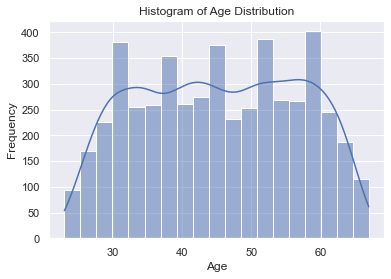

In [15]:
sns.histplot(data = df, x= "Age", kde = True)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age Distribution")
plt.show()


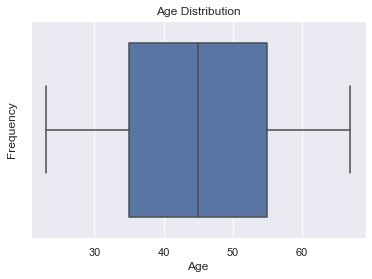

In [16]:
sns.boxplot(data =df, x = "Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()

- Age appears to be normally distributed with the mean very close to median( refer to the data description)
- Also, 25% of customers are aged between 23 to 35 years of age

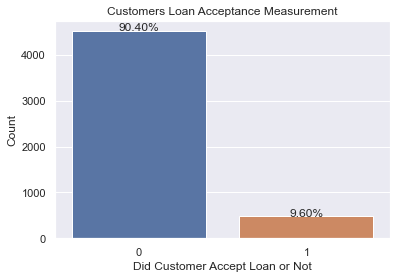

In [17]:
acc_wk_plot = sns.countplot(data = df, x= "Personal_Loan")
for p in acc_wk_plot.patches: 
    height = p.get_height() 
    acc_wk_plot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(df))*100)+'%',  
      ha="center")
plt.xlabel("Did Customer Accept Loan or Not")
plt.ylabel("Count")
plt.title("Customers Loan Acceptance Measurement")
plt.show()

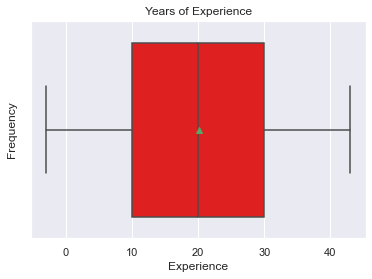

In [18]:
sns.boxplot(data =df, x = "Experience",showmeans = True , color = "red")
plt.xlabel("Experience")
plt.ylabel("Frequency")
plt.title("Years of Experience")
plt.show()

In [19]:
df["Experience"].min()

-3

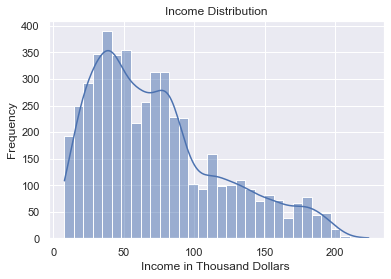

In [20]:
# we explore the income distribution of customers
sns.histplot(data= df, x= "Income", kde= True)
plt.xlabel("Income in Thousand Dollars ")
plt.ylabel("Frequency")
plt.title("Income Distribution")
plt.show()

Customer income is slightly skewed to the right as majority of the customers have income between 8 and 80,000 dllars

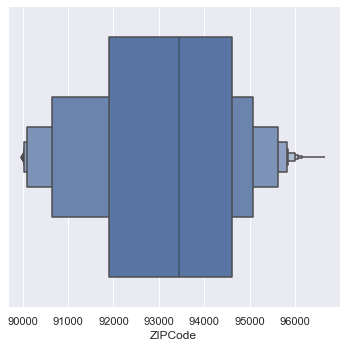

In [21]:
sns.catplot(data = df, x= "ZIPCode", kind ="boxen" )

majority of the banks' customers live with zipcodes 92000 and 95000

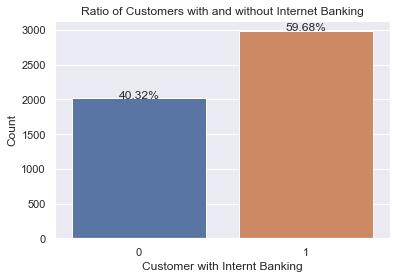

In [22]:
internet_b = sns.countplot(data = df, x= "Online")
for p in internet_b.patches: 
    height = p.get_height() 
    internet_b.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(df))*100)+'%',  
      ha="center")
plt.xlabel("Customer with Internt Banking")
plt.ylabel("Count")
plt.title("Ratio of Customers with and without Internet Banking")
plt.show()

59.68% of customers engage in internet banking while 40.32 did not

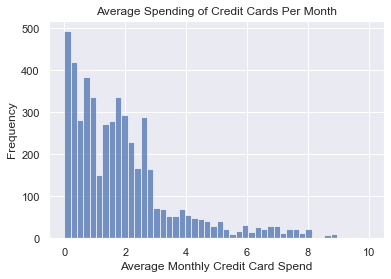

In [23]:
sns.histplot(data = df, x= "CCAvg")
plt.xlabel("Average Monthly Credit Card Spend")
plt.ylabel("Frequency")
plt.title("Average Spending of Credit Cards Per Month")
plt.show()

majority of the customers spend  3 thousand dollars or less in credit card spending monthly. More people spend 300 dollars monthly (which is the mode.

In [24]:
df.CCAvg.mode()

0    0.3
Name: CCAvg, dtype: float64

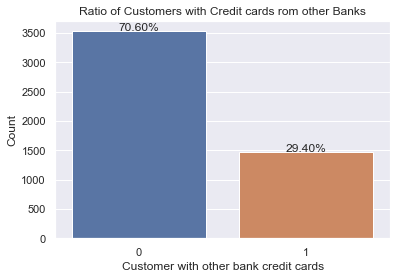

In [25]:
credit_card = sns.countplot(data = df, x= "CreditCard")
for p in credit_card.patches: 
    height = p.get_height() 
    credit_card.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(df))*100)+'%',  
      ha="center")
plt.xlabel("Customer with other bank credit cards")
plt.ylabel("Count")
plt.title("Ratio of Customers with Credit cards rom other Banks")
plt.show()

29.40% of customers have credit cards with other banks

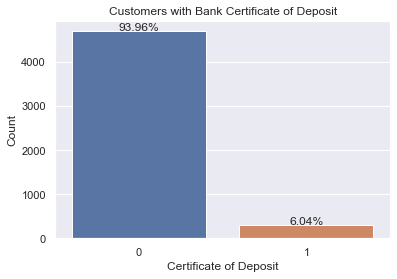

In [26]:
cd_acct = sns.countplot(data = df, x= "CD_Account")
for p in cd_acct.patches: 
    height = p.get_height() 
    cd_acct.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(df))*100)+'%',  
      ha="center")
plt.xlabel("Certificate of Deposit")
plt.ylabel("Count")
plt.title("Customers with Bank Certificate of Deposit")
plt.show()

Only 6.04% of customers have certificates of deposit

## BIVARIATE ANALYSIS

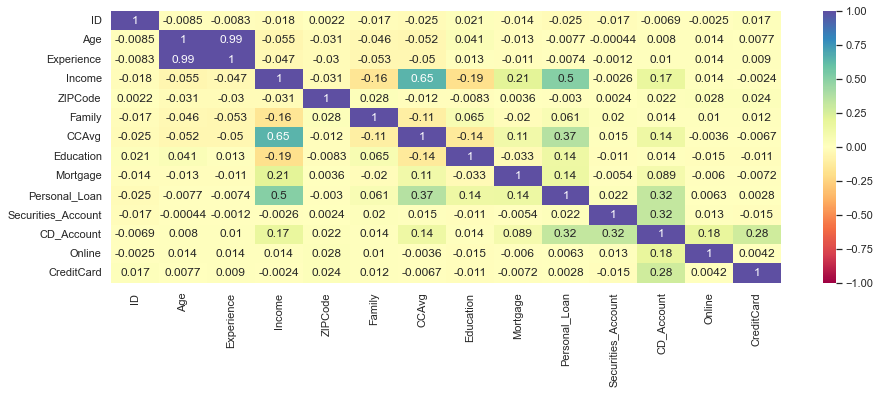

In [27]:
corr_data = df.corr()
plt.figure(figsize =(15,5))
sns.heatmap(data= corr_data, annot = True, vmin = -1, vmax = 1, cmap = "Spectral", center =0)

plt.show()

there is some positive correlation between personal loan and Income. 
There is also some positive correlation between Personal loan and Average Spending on credit cards per month
Experience and Age are highly correlated a case of multi-colinearity.

In [28]:
df.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


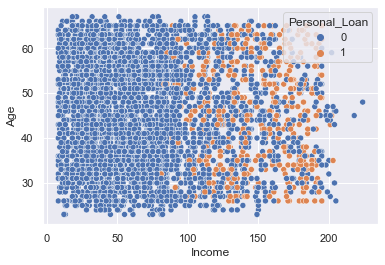

In [29]:
sns.scatterplot(data = df, x = "Income", y= "Age", hue = "Personal_Loan")
plt.show()

Lower incomed individuals do not take loans. Majority of the individuals who took personal had higher income

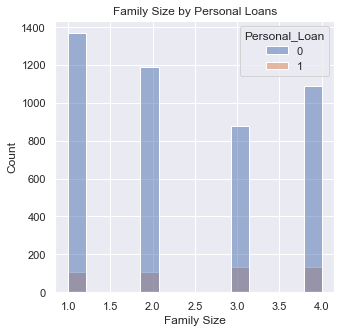

In [30]:
plt.figure(figsize= (5,5))
sns.histplot(data = df, x = "Family", hue = "Personal_Loan")
plt.title("Family Size by Personal Loans")
plt.xlabel("Family Size")
plt.show()

Families with 3 members and above collected more personal loans

## Select the data to use for the machine learning
- We will drop ID column as they are just identifiers assigned to the customers for identification and will not contribute any thing to the data

In [31]:
X = df.drop(["ID","Personal_Loan"], axis =1) # we remove the ID column and peronal_loan and group th rest to be our x variables
y = df["Personal_Loan"] # we choose our y variables

## Split the data into train and test split

In [32]:
#import the function to split the data
from sklearn.model_selection import train_test_split

# next we split the data
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state= 0, stratify = y)

In [33]:
#check the dimensions of the data
X_train.shape,

X_test.shape

(1500, 12)

## Standadize the data

In [34]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x_train_sc = scaler.fit_transform(X_train) # this is the one we fit this one into the 
x_test_sc =scaler.transform(X_test) # we only transform the the test and validation models

## Build the Models

### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression #import model

logReg = LogisticRegression(class_weight={0:0.2,1:0.8 }, random_state= 0)

logReg.fit(x_train_sc, y_train)

LogisticRegression(class_weight={0: 0.2, 1: 0.8})

In [36]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [37]:
#function to compute the different metrics to check the model's performance

In [38]:
def model_perf (model, predictors, target):
    #predict with the training data
    pred = model.predict(predictors)
    
    
    # metrics for measurements are assigned to varibales
    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)
    
    #create a dataframe for the metrics
    df_perf = pd.DataFrame(
        { "Accuracy":acc,
         "Recall": recall,
         "Precision": precision,
         "F1_Score": f1
        
    }, 
        index=[0]
    )
    return df_perf, pred

In [39]:
trained_df, pred_y = model_perf(logReg, x_train_sc, y_train)

In [40]:
trained_df

,Accuracy,Recall,Precision,F1_Score
0,0.931714,0.806548,0.608989,0.693982


In [41]:
pred_y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
def conf_matrix(target, predictions):
    conf = confusion_matrix(target, predictions)
    plt.figure(figsize= (8,5))
    sns.heatmap(conf, annot= True, fmt = "g")
    plt.xlabel(" Actual Values")
    plt.ylabel (" Predicted Values")

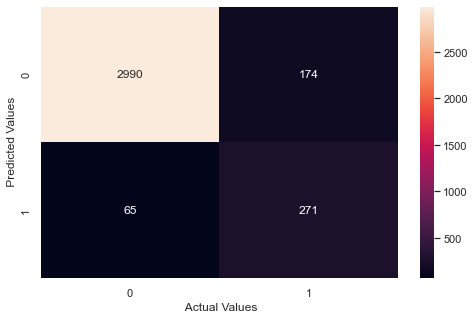

In [45]:
conf_matrix(y_train, pred_y)

- The model 2990 people who did not collect loans accurately while it predicted 271 people who collected loans accurately.

In [52]:
# we change parameters
logReg1 = LogisticRegression(class_weight={0:0.1,1:0.9 },solver = "liblinear",penalty ='l1')

logReg1.fit(x_train_sc, y_train)

trained_df1, pred_y1 = model_perf(logReg1, x_train_sc, y_train)

In [53]:
trained_df1

,Accuracy,Recall,Precision,F1_Score
0,0.894857,0.886905,0.474522,0.618257


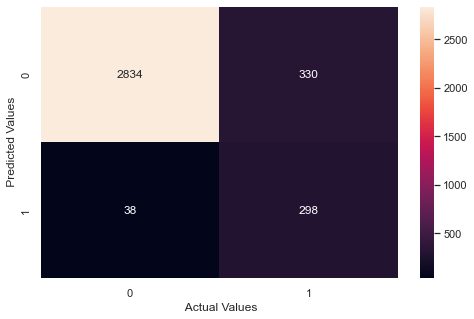

In [54]:
conf_matrix(y_train, pred_y1)

In [55]:
# the model showed improvement in predicting those who collected loans which is the focus of the business needs

In [ ]:
logReg1.

### Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
clf = DecisionTreeClassifier(random_state= 0)
clf.fit(x_train_sc, y_train)

DecisionTreeClassifier(random_state=0)

In [61]:
clftrained_df1, clfpred_y1 = model_perf(clf, x_train_sc, y_train)

In [63]:
clftrained_df1

,Accuracy,Recall,Precision,F1_Score
0,1.0,1.0,1.0,1.0


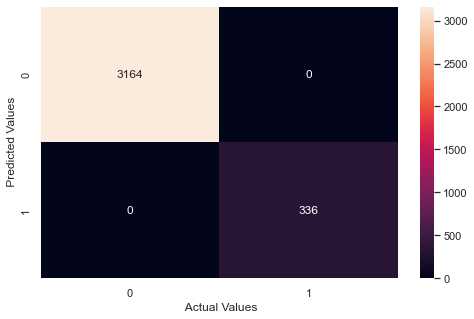

In [64]:
conf_matrix(y_train, clfpred_y1)

- the output shows overfitting so we will use the data that has not been scaled  and adjust the max_depth and class weights

In [80]:
clf1 = DecisionTreeClassifier(random_state= 0, max_depth= 3, criterion ='gini', class_weight={0:0.1,1:0.9 })
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=3,
                       random_state=0)

In [81]:
clftrained_df2, clfpred_y2 = model_perf(clf1, X_train, y_train)

In [82]:
clftrained_df2

,Accuracy,Recall,Precision,F1_Score
0,0.948286,0.979167,0.654076,0.784267


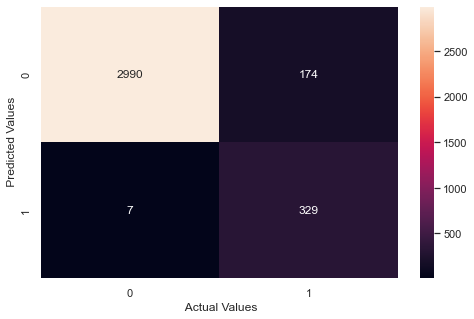

In [83]:
conf_matrix(y_train, clfpred_y2)

- the Decision Tree classifier gave a much better prediction on the recall which is what the Bank is interested in. 
- only 7 customers who did actually collected loans were predicted inaccurately

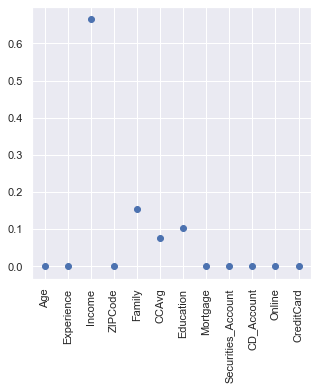

In [92]:
# feature importance
plt.figure(figsize=(5,5))
plt.plot(clf1.feature_importances_,'o')
plt.xticks(range(X.shape[1]), X.columns, rotation = 90)
plt.show()

- income was the highest contributing feature by a high margin to the model followed byfamily size and then education

### Random Forest Classifier

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rf = RandomForestClassifier(random_state= 0, max_depth= 3, class_weight={0:0.1,1:0.9 })
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=3,
                       random_state=0)

In [88]:
rftrained_df, rfpred_y = model_perf(rf, X_train, y_train)

In [89]:
rftrained_df

,Accuracy,Recall,Precision,F1_Score
0,0.892571,0.964286,0.47093,0.632812


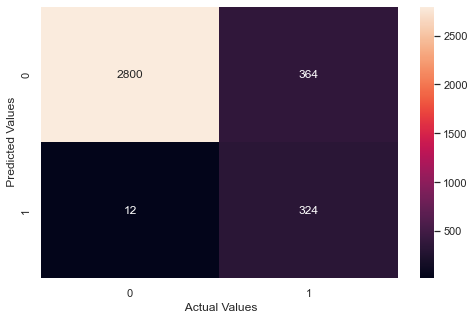

In [90]:
conf_matrix(y_train, rfpred_y)

- the Random Forest model presict 324 people who collected loans accurately and only 12 inaccurately

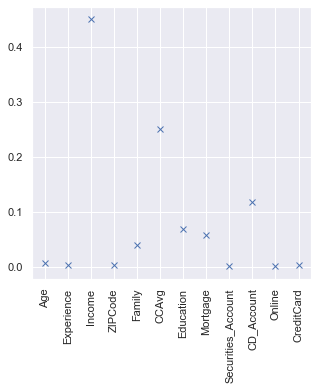

In [94]:
# feature importance
plt.figure(figsize=(5,5))
plt.plot(rf.feature_importances_,'x')
plt.xticks(range(X.shape[1]), X.columns, rotation = 90)
plt.show()

- income is the most important feature used in the RandomForest model followed Average Credit card spending per month .

### Gradient Boosting

In [97]:
from sklearn.ensemble import GradientBoostingClassifier

In [100]:
gb = GradientBoostingClassifier(random_state= 0, max_depth= 3)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [101]:
gbtrained_df, gbpred_y = model_perf(gb, X_train, y_train)

In [102]:
gbtrained_df

,Accuracy,Recall,Precision,F1_Score
0,0.996571,0.967262,0.996933,0.981873


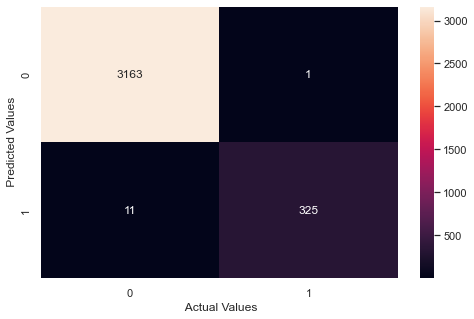

In [103]:
conf_matrix(y_train, gbpred_y)

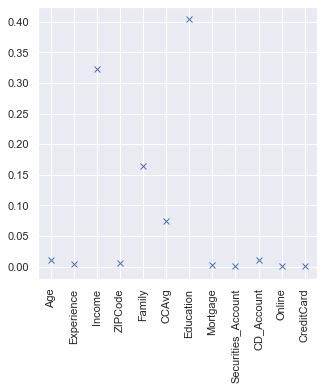

In [104]:
# feature importance
plt.figure(figsize=(5,5))
plt.plot(gb.feature_importances_,'x')
plt.xticks(range(X.shape[1]), X.columns, rotation = 90)
plt.show()

- Again income, education, family and  Average credit card rating an are important features

### Conclusion

In [ ]:
Income plays an important role especially those who earn over 80000 per annum and have a family size of 3 and above.